<a href="https://colab.research.google.com/github/imazerty/1project/blob/master/objectRecognitionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import keras
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
import sklearn

In [8]:
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Keras: 2.2.4


In [3]:
#load data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [11]:
print('Training images: {} '.format(X_train.shape))
print('Test images: {} '.format(X_test.shape))

Training images: (50000, 32, 32, 3) 
Test images: (10000, 32, 32, 3) 


In [12]:
print('first image : {} '.format(X_train[0].shape))

first image : (32, 32, 3) 


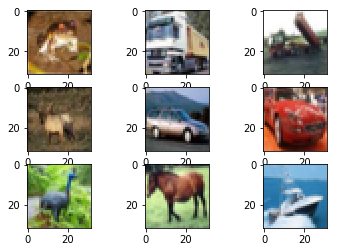

In [5]:
# grid of 3*3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  img = X_train[i]
  plt.imshow(img)

plt.show()

In [0]:
#preprocessing dataset

#fix seed for reproducibility
seed = 5
np.random.seed(seed)
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [0]:
#normalize dataset from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=  255.0
X_test /= 255.0

In [17]:
#one hot encoding; example: [6] = [0,0,0,0,0,0,1,0,0,0]
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]
print('num_classes : {}'.format(num_classes))
print(Y_train.shape)
print(Y_train[0]) #frog : 6

num_classes : 10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##Table: The All-CNN-C network used for classification on CIFAR-10 
###Model-C

Input 32 × 32 RGB image
*  3 × 3 conv. 96 ReLU
*  3 × 3 conv. 96 ReLU
*  3 × 3 max-pooling stride 2
*  3 × 3 conv. 192 ReLU
*  3 × 3 conv. 192 ReLU
*  3 × 3 max-pooling stride 2
*  3 × 3 conv. 192 ReLU
*  1 × 1 conv. 192 ReLU
*  1 × 1 conv. 10 ReLU
*  global averaging over 6 × 6 spatial dimensions
*  10 or 100-way softmax


In [0]:
#importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout,  GlobalAveragePooling2D, Activation
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD

In [0]:
#define the model function
def allcnn(weights = None):
  model = Sequential()
  model.add(Conv2D(96, (3, 3), padding = 'same', input_shape = (32, 32, 3) ))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(192, (3, 3), padding = 'same' ))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(192, (3, 3), padding = 'same' ))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1,1), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(10, (1,1), padding = 'valid'))
  model.add(Activation('relu'))
  
  #add Global Average Pooling with sftmax
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  
  #load weights
  if weights:
    model.load_weights(weights)
    
  return model

In [29]:
#defie hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#load model
model = allcnn()
#optiizer and a compiler
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


W0726 01:58:27.185061 140596766783360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 01:58:27.198089 140596766783360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 01:58:27.257219 140596766783360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 01:58:27.266047 140596766783360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [31]:
#print summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [32]:
#adding additional parameters
epochs= 350
batch_size = 32
#fit the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

W0726 02:06:39.720295 140596766783360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/350
50000/50000 [==============================] - 33s 650us/step - loss: 2.0300 - acc: 0.2320 - val_loss: 1.7616 - val_acc: 0.3207
Epoch 2/350
50000/50000 [==============================] - 26s 526us/step - loss: 1.5469 - acc: 0.4232 - val_loss: 1.3408 - val_acc: 0.5085
Epoch 3/350
50000/50000 [==============================] - 27s 540us/step - loss: 1.2582 - acc: 0.5436 - val_loss: 1.0685 - val_acc: 0.6187
Epoch 4/350
50000/50000 [==============================] - 27s 547us/step - loss: 1.0630 - acc: 0.6213 - val_loss: 0.9622 - val_acc: 0.6542
Epoch 5/350
50000/50000 [==============================] - 27s 537us/step - loss: 0.9219 - acc: 0.6731 - val_loss: 0.8374 - val_acc: 0.7030
Epoch 6/350
50000/50000 [==============================] - 27s 536us/step - loss: 0.8152 - acc: 0.7151 - val_loss: 0.8446 - val_acc: 0.6985
Epoch 7/350
50000/50000 [==============================] - 27s 539us/step - loss: 0.7307 - acc: 0.7455 - val_l

KeyboardInterrupt: ignored

In [34]:
#if we load pretrained weights (hdf5 for keras)
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
#build model
model1 = allcnn(weights)
#optimizer
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum = momentum, nesterov= True)
#compile model
model1.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
#evaluate model
scores = model1.evaluate(X_test, Y_test, verbose = 1)
print('accuracy = {}'.format(scores[1]))

10000/10000 [==============================] - 2s 193us/step
accuracy = 0.9052


In [36]:
#make a dictionary of class labels and names
classes = range(0, 10)
names = ['airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck']
class_labels = dict(zip(classes, names))
print(class_labels)

                    

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [38]:
batch = X_test[100:110]
labels = np.argmax(Y_test[100:110], axis = -1)
#predict
predictions = model.predict(batch, verbose = 1 )
print(predictions.shape)

10/10 [==============================] - 0s 533us/step
(10, 10)


In [40]:
#let's make sure all probabilities for an image = 1
for image in predictions:
  print(np.sum(image, axis = -1))

1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0
1.0


In [42]:
#use np.argmax to deduce class labels from prob
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 3 6 8 7]


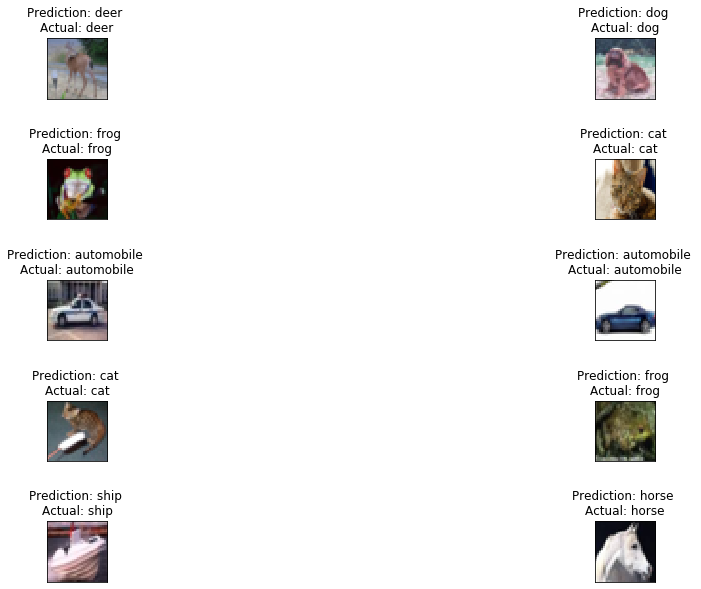

In [60]:
#grid of 3*3  iages
fig, axis = plt.subplots(5, 2, figsize = (18, 10))
fig.subplots_adjust(hspace = 1)
axis = axis.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {} \nActual: {}'.format(value, class_labels[labels[i]])
      axis[i].set_title(title)
      axis[i].axes.get_xaxis().set_visible(False)
      axis[i].axes.get_yaxis().set_visible(False)
  axis[i].imshow(img)
      
plt.show()